# Fisher's Linear Discriminant


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from datasets import blob_1, blob_2

## Import the dataset

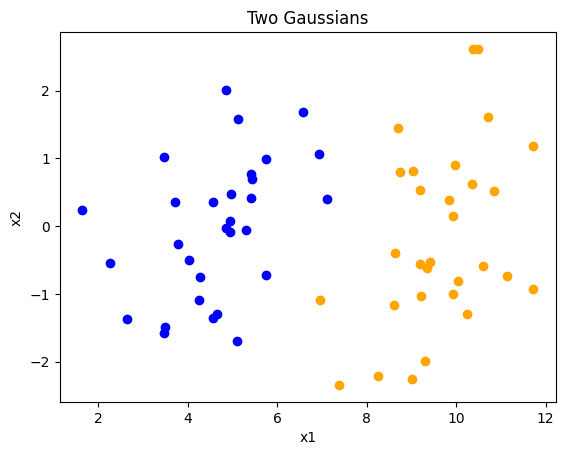

In [2]:
# Display the blobs
plt.scatter(blob_1[:, 0], blob_1[:, 1], color='blue', label='Class 1')
plt.scatter(blob_2[:, 0], blob_2[:, 1], color='orange', label='Class 2')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Two Gaussians')
plt.show()

## Find Fisher's Linear Discriminant

In [3]:
def fisher_linear_discriminant(blob_1, blob_2):
    """
    Find the normalized weight w of linear discriminant
    :param blob_1: datapoints in class 1
    :param blob_2: datapoints in class 2
    :return: normalized w
    """
    # Find the mean of each blobs
    m_1 = np.sum(blob_1, axis=0) / len(blob_1)
    m_2 = np.sum(blob_2, axis=0) / len(blob_2)
    
    # Calculate s_w
    s_w = (blob_1 - m_1).T @ (blob_1 - m_1) + (blob_2 - m_2).T @ (blob_2 - m_2)
    
    # Calculate w
    w = np.linalg.solve(s_w, m_2 - m_1)
    
    # Normalize w
    w = w / np.sqrt(np.linalg.norm(w, 2))
    return w

In [4]:
# Find w
w = fisher_linear_discriminant(blob_1, blob_2)

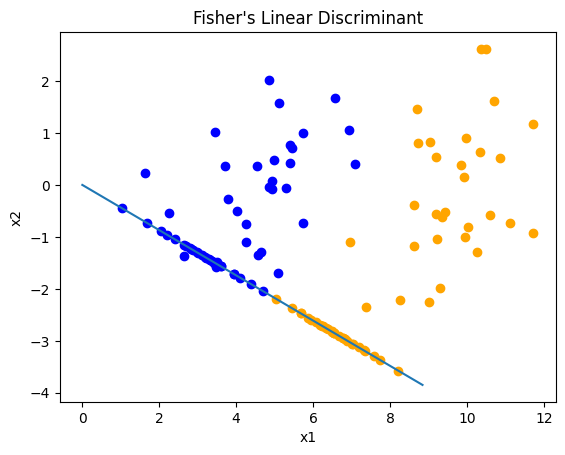

In [9]:
# Project blob_1 and blob_2
blob_1_projected = np.dot(blob_1, w)
blob_2_projected = np.dot(blob_2, w)

# Draw the original datapoints
scale = 34
plt.plot([0, w[0] * scale], [0, w[1] * scale])
plt.scatter(blob_1[:, 0], blob_1[:, 1], color='blue', label='Class 1')
plt.scatter(blob_2[:, 0], blob_2[:, 1], color='orange', label='Class 2')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title("Fisher's Linear Discriminant")

# Render the projection
scale = 10
coord_1 = blob_1_projected.reshape(-1, 1) * w.reshape(1, -1) * scale
coord_2 = blob_2_projected.reshape(-1, 1) * w.reshape(1, -1) * scale
plt.scatter(coord_1[:, 0], coord_1[:, 1], color='blue')
plt.scatter(coord_2[:, 0], coord_2[:, 1], color='orange')
plt.savefig('figures/fig.png')
plt.show()